In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**SMOODH CREATIONS PRJ07**

In [2]:
from tqdm import tqdm
tqdm.pandas()
train_df = pd.read_csv("/kaggle/input/boundary-box-data/dataset/train.csv")

In [3]:
train_df_updated = train_df.copy()
def update_range(row):
    xmax = row['xmax']
    xmin = row['xmin']
    ymax = row['ymax']
    ymin = row['ymin']
    row['xmax'] = xmax*2
    row['xmin'] = xmin*2
    row['ymax'] = ymax*2
    row['ymin'] = ymin*2
    xmax = row['xmax']
    xmin = row['xmin']
    ymax = row['ymax']
    ymin = row['ymin']
    if (xmax>1920):
        row['xmax'] = 1920
    if (xmin<0):
        row['xmin'] = 0
    if (ymax>1080):
        row['ymax'] = 1080
    if (ymin<0):
        row['ymin'] = 0
    row['bbox'] = [row['xmin'],row['xmax'],row['ymin'],row['ymax']]
    return row
train_df_updated = train_df_updated.progress_apply(update_range,axis=1)
train_df2 = train_df_updated.copy()
train_df2 = train_df2.groupby(['image_path','class'])['bbox'].apply(list).reset_index(name='bboxes')
train_df2    

100%|██████████| 19950/19950 [00:18<00:00, 1069.49it/s]


,image_path,class,bboxes
0,000b0fd767c5ab2656b7ed8d43674777.jpg,3.0,"[[804.0, 984.0, 502.0, 648.0]]"
1,000ed1547634a24f09f22530065d46c9.jpg,7.0,"[[1020.0, 1388.0, 280.0, 426.0]]"
2,0011b4d3f9068a9efbb84dc3157b76c9.jpg,3.0,"[[1698.0, 1920, 446.0, 570.0], [0, 98.0, 396.0..."
3,0019a9ab6fd5ef3df915241bc323afb5.jpg,4.0,"[[0.0, 980.0, 186.0, 1080], [0, 648.0, 328.0, ..."
4,00349ffee00a2ce026ffb36e4e37caab.jpg,3.0,"[[1552.0, 1676.0, 360.0, 480.0], [1722.0, 1878..."
...,...,...,...
9463,ffdbbc2f9afb28c2741739f868c88670.jpg,7.0,"[[362.0, 482.0, 312.0, 418.0]]"
9464,ffe49f9e20bcefe4c0f6e8bc90643308.jpg,3.0,"[[270.0, 514.0, 596.0, 842.0]]"
9465,ffe49f9e20bcefe4c0f6e8bc90643308.jpg,7.0,"[[436.0, 606.0, 330.0, 486.0]]"
9466,fff53b56bb409098e9d1efd05ceba7f0.jpg,2.0,"[[1008.0, 1566.0, 526.0, 1028.0], [1358.0, 179..."


In [4]:
from sklearn.model_selection import train_test_split
df_train,df_valid = train_test_split(train_df2,test_size=0.1,random_state=42,shuffle=True)
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)

In [5]:
!mkdir /kaggle/working/Theme1_new_data/
!mkdir /kaggle/working/Theme1_new_data/images/
!mkdir /kaggle/working/Theme1_new_data/labels/
!mkdir /kaggle/working/Theme1_new_data/images/train/
!mkdir /kaggle/working/Theme1_new_data/images/validation/
!mkdir /kaggle/working/Theme1_new_data/labels/train/
!mkdir /kaggle/working/Theme1_new_data/labels/validation/
!mkdir /kaggle/working/Theme1_new_data/images/test/

In [6]:
output_path = "/kaggle/working/Theme1_new_data"
import os
os.listdir(output_path)

['images', 'labels']

In [7]:
df_train.head()

,image_path,class,bboxes
0,a1dd30a49538cfef88952ce1149c1f42.jpg,3.0,"[[582.0, 690.0, 450.0, 528.0], [522.0, 634.0, ..."
1,9b44562a4d05c9495f91df807196c38d.jpg,9.0,"[[0, 1100.0, 418.0, 954.0], [558.0, 1880.0, 43..."
2,c11965bb64ff33f64ed45997fcd48f3b.jpg,9.0,"[[0, 1164.0, 304.0, 556.0], [620.0, 1702.0, 30..."
3,1a7f5bd2246c0f16b7c6ba175f977cbc.jpg,3.0,"[[380.0, 528.0, 600.0, 674.0], [256.0, 432.0, ..."
4,2a9cb28710df69d75707c8cbce04a9b0.jpg,3.0,"[[374.0, 612.0, 362.0, 488.0], [522.0, 748.0, ..."


In [8]:
df_train.bboxes[0]

[[582.0, 690.0, 450.0, 528.0], [522.0, 634.0, 462.0, 570.0]]

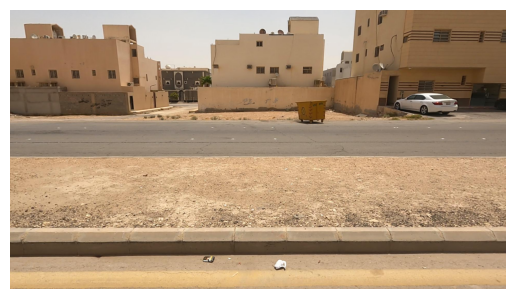

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

show_img_path = '/kaggle/input/boundary-box-data/dataset/images/'+df_train.image_path[1]

# Load the image using PIL
image = Image.open(show_img_path)

# Convert the image to a numpy array
image_array = np.array(image)

# Display the image
plt.imshow(image_array)
plt.axis('off')  # Remove the axis labels
plt.show()


In [10]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt



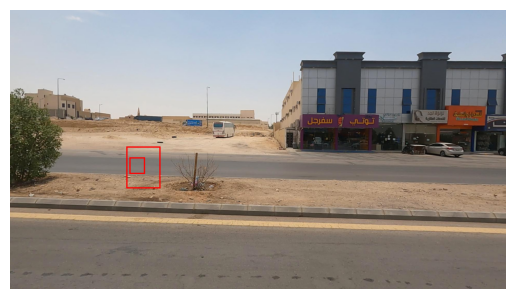

In [11]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load the image using PIL
show_img_path = '/kaggle/input/boundary-box-data/dataset/images/'+ df_train.image_path[0]
image = Image.open(show_img_path)

# Retrieve the bounding box coordinates from the DataFrame column
bounding_boxes = df_train.bboxes[0]  # Assuming the bounding box data is in the first row of the column

# Draw the bounding boxes on the image
draw = ImageDraw.Draw(image)

for bbox in bounding_boxes:
    x0, y0, x1, y1 = bbox  # Assuming the bounding box coordinates are in [x0, y0, x1, y1] format
    x_min, y_min = min(x0, x1), min(y0, y1)
    x_max, y_max = max(x0, x1), max(y0, y1)
    draw.rectangle([(x_min, y_min), (x_max, y_max)], outline='red', width=5)

# Display the image with the bounding boxes
plt.imshow(image)
plt.axis('off')  # Remove the axis labels
plt.show()


In [12]:
import shutil
import numpy as np
data_path = "/kaggle/input/boundary-box-data/dataset/images"
def process_data(data,data_type="train"):
    for i,row in tqdm(data.iterrows(),total=len(data)):
        image_name = row['image_path'][:-4]
        bounding_boxes = row['bboxes']
        classs = row['class']
        yolo_data=[]
        for bbox in bounding_boxes:
            xmin = bbox[0]
            xmax = bbox[1]
            ymin = bbox[2]
            ymax = bbox[3]
            width = (xmax-xmin)
            height = (ymax-ymin)
            x_center = xmin+width/2
            y_center = ymin+height/2
            x_center /= 1920.0
            y_center /= 1080.0
            width/=1920.0
            height/=1080.0
            yolo_data.append([classs,x_center,y_center,width,height])
        yolo_data = np.array(yolo_data)
        np.savetxt(os.path.join(output_path,f"labels/{data_type}/{image_name}.txt"),yolo_data,fmt=["%d","%f","%f","%f","%f"])
        shutil.copyfile(os.path.join(data_path,f"{image_name}.jpg"),os.path.join(output_path,f"images/{data_type}/{image_name}.jpg"))


In [13]:
process_data(df_train,data_type="train")

100%|██████████| 8521/8521 [01:08<00:00, 123.89it/s]


In [14]:
process_data(df_valid,data_type="validation")

100%|██████████| 947/947 [00:06<00:00, 146.22it/s]


In [15]:
test_df = pd.read_csv("/kaggle/input/boundary-box-data/dataset/test.csv")
test_df.head()

,image_path
0,953ab1447c46ecfef67ab14629cd70c7.jpg
1,e4ddbaa7970fca225a51288ce5f7d3f9.jpg
2,5b8120d69607a077b7583334be3ba18b.jpg
3,138b1dc82005b4c33e4886260649d313.jpg
4,0f91ec1533b845b13089f8cf4e0a36f7.jpg


In [16]:
import shutil
import numpy as np
data_path = "/kaggle/input/boundary-box-data/dataset/images"
def process_test_data(data):
    for i,row in tqdm(data.iterrows(),total=len(data)):
        image_name = row['image_path'][:-4]
        shutil.copyfile(os.path.join(data_path,f"{image_name}.jpg"),os.path.join(output_path,f"images/test/{image_name}.jpg"))
process_test_data(test_df)

100%|██████████| 2092/2092 [00:16<00:00, 124.30it/s]


In [17]:
train_df.head(10)

,class,image_path,name,xmax,xmin,ymax,ymin
0,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,797.0,701.0,262.0,211.0
1,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,932.0,786.0,329.0,238.0
2,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,736.0,657.0,275.0,229.0
3,7.0,ea906a663da6321bcef78be4b7d1afff.jpg,BAD_BILLBOARD,986.0,786.0,136.0,0.0
4,8.0,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,667.0,549.0,228.0,179.0
5,8.0,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,799.0,628.0,238.0,176.0
6,8.0,8ca1b825716ea6755180fde347ac79c1.jpg,SAND_ON_ROAD,532.0,434.0,196.0,147.0
7,0.0,8ca1b825716ea6755180fde347ac79c1.jpg,GRAFFITI,549.0,471.0,177.0,131.0
8,0.0,8ca1b825716ea6755180fde347ac79c1.jpg,GRAFFITI,667.0,565.0,182.0,123.0
9,2.0,e1f3026bc4b1689d81f03e92e9043c2b.jpg,POTHOLES,841.0,640.0,408.0,284.0


**LETS VISUALIZE PITHOLES AND OBJECTS ON ROAD**

In [18]:
train_df['bbox'] = train_df['xmax'].astype(str) + ','+ train_df['xmin'].astype(str)+','+train_df['ymax'].astype(str) +','+train_df['ymin'].astype(str)
train_df.head(10)

,class,image_path,name,xmax,xmin,ymax,ymin,bbox
0,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,797.0,701.0,262.0,211.0,"797.0,701.0,262.0,211.0"
1,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,932.0,786.0,329.0,238.0,"932.0,786.0,329.0,238.0"
2,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,736.0,657.0,275.0,229.0,"736.0,657.0,275.0,229.0"
3,7.0,ea906a663da6321bcef78be4b7d1afff.jpg,BAD_BILLBOARD,986.0,786.0,136.0,0.0,"986.0,786.0,136.0,0.0"
4,8.0,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,667.0,549.0,228.0,179.0,"667.0,549.0,228.0,179.0"
5,8.0,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,799.0,628.0,238.0,176.0,"799.0,628.0,238.0,176.0"
6,8.0,8ca1b825716ea6755180fde347ac79c1.jpg,SAND_ON_ROAD,532.0,434.0,196.0,147.0,"532.0,434.0,196.0,147.0"
7,0.0,8ca1b825716ea6755180fde347ac79c1.jpg,GRAFFITI,549.0,471.0,177.0,131.0,"549.0,471.0,177.0,131.0"
8,0.0,8ca1b825716ea6755180fde347ac79c1.jpg,GRAFFITI,667.0,565.0,182.0,123.0,"667.0,565.0,182.0,123.0"
9,2.0,e1f3026bc4b1689d81f03e92e9043c2b.jpg,POTHOLES,841.0,640.0,408.0,284.0,"841.0,640.0,408.0,284.0"


In [19]:
train_df['bbox_list'] = train_df['bbox'].apply(lambda x: [x])


In [20]:
train_df.head()

,class,image_path,name,xmax,xmin,ymax,ymin,bbox,bbox_list
0,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,797.0,701.0,262.0,211.0,"797.0,701.0,262.0,211.0","[797.0,701.0,262.0,211.0]"
1,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,932.0,786.0,329.0,238.0,"932.0,786.0,329.0,238.0","[932.0,786.0,329.0,238.0]"
2,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,736.0,657.0,275.0,229.0,"736.0,657.0,275.0,229.0","[736.0,657.0,275.0,229.0]"
3,7.0,ea906a663da6321bcef78be4b7d1afff.jpg,BAD_BILLBOARD,986.0,786.0,136.0,0.0,"986.0,786.0,136.0,0.0","[986.0,786.0,136.0,0.0]"
4,8.0,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,667.0,549.0,228.0,179.0,"667.0,549.0,228.0,179.0","[667.0,549.0,228.0,179.0]"


In [21]:
train_df.bbox[0]

'797.0,701.0,262.0,211.0'

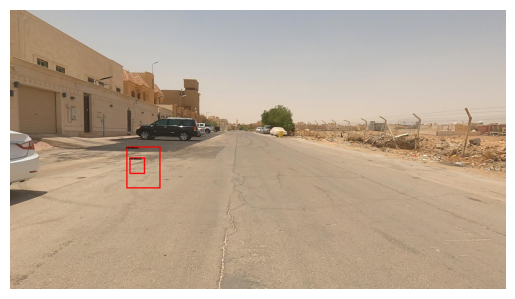

In [22]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load the image using PIL
show_img_path = train_df.image_path[0]
show_img_path = '/kaggle/input/boundary-box-data/dataset/images/'+ train_df.image_path[0]
image = Image.open(show_img_path)
image = Image.open(show_img_path)

# Retrieve the bounding box coordinates from the DataFrame column
bounding_boxes =df_train.bboxes[0] 
font_size = 1000 # Assuming the bounding box data is in the first row of the column
label = train_df.name[9]
# Draw the bounding boxes on the image
draw = ImageDraw.Draw(image)
for bbox in bounding_boxes:
    x0, y0, x1, y1 = bbox  # Assuming the bounding box coordinates are in [x0, y0, x1, y1] format
    x_min, y_min = min(x0, x1), min(y0, y1)
    x_max, y_max = max(x0, x1), max(y0, y1)
    draw.rectangle([(x_min, y_min), (x_max, y_max)], outline='red', width=5)
    draw.text((x_min, y_min), label, fill='black', font_size=font_size)


# Display the image with the bounding boxes
plt.imshow(image)
plt.axis('off')  # Remove the axis labels
plt.show()

In [23]:
import ast

In [24]:
train_df.bbox = train_df.bbox.apply(ast.literal_eval)

In [25]:
smart_yaml = { "train" : '/kaggle/working/Theme1_new_data/images/train',"val" : '/kaggle/working/Theme1_new_data/images/validation',"nc":11,"names": ["GRAFFITI","FADED SIGNAGE","POTHOLES","GARBAGE","CONSTRUCTION ROAD","BROKEN_SIGNAGE","BAD STREETLIGHT","BAD BILLBOARD","SAND ON ROAD","CLUTTER_SIDEWALK","UNKEPT_FACADE"]}
smart_yaml

{'train': '/kaggle/working/Theme1_new_data/images/train',
 'val': '/kaggle/working/Theme1_new_data/images/validation',
 'nc': 11,
 'names': ['GRAFFITI',
  'FADED SIGNAGE',
  'POTHOLES',
  'GARBAGE',
  'CONSTRUCTION ROAD',
  'BROKEN_SIGNAGE',
  'BAD STREETLIGHT',
  'BAD BILLBOARD',
  'SAND ON ROAD',
  'CLUTTER_SIDEWALK',
  'UNKEPT_FACADE']}

In [26]:
os.chdir('/kaggle/working')
!pwd

/kaggle/working


In [27]:
import yaml
#some_dict = {'a': 1, 'b': 2}

with open(r'smart_yaml.yaml', 'w') as file:
    doc = yaml.dump(smart_yaml,file)


In [28]:
data = '/kaggle/working/Theme1_new_data'
data_img = '/kaggle/working/Theme1_new_data/images'
data_labels = '/kaggle/working/Theme1_new_data/labels'
data_img_train = '/kaggle/working/Theme1_new_data/images/train'
data_img_val = '/kaggle/working/Theme1_new_data/images/validation'
data_label_train = '/kaggle/working/Theme1_new_data/labels/train'
data_label_val  = '/kaggle/working/Theme1_new_data/labels/validation'

In [29]:
train_df.head(5)

,class,image_path,name,xmax,xmin,ymax,ymin,bbox,bbox_list
0,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,797.0,701.0,262.0,211.0,"(797.0, 701.0, 262.0, 211.0)","[797.0,701.0,262.0,211.0]"
1,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,932.0,786.0,329.0,238.0,"(932.0, 786.0, 329.0, 238.0)","[932.0,786.0,329.0,238.0]"
2,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,736.0,657.0,275.0,229.0,"(736.0, 657.0, 275.0, 229.0)","[736.0,657.0,275.0,229.0]"
3,7.0,ea906a663da6321bcef78be4b7d1afff.jpg,BAD_BILLBOARD,986.0,786.0,136.0,0.0,"(986.0, 786.0, 136.0, 0.0)","[986.0,786.0,136.0,0.0]"
4,8.0,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,667.0,549.0,228.0,179.0,"(667.0, 549.0, 228.0, 179.0)","[667.0,549.0,228.0,179.0]"


In [30]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15968, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 15968 (delta 84), reused 113 (delta 75), pack-reused 15831
Receiving objects: 100% (15968/15968), 14.60 MiB | 23.29 MiB/s, done.
Resolving deltas: 100% (10953/10953), done.


In [31]:
%cd yolov5

/kaggle/working/yolov5


In [ ]:
yaml_dir = '/kaggle/working/smart_yaml.yaml'

In [32]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.4/595.4 kB 9.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 18.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60


In [ ]:
# with open('/kaggle/working/output_file.pkl', 'rb') as fin:
#     new_dict = pkl.load(fin)
!python /kaggle/working/yolov5/train.py --img 640 --cfg /kaggle/working/yolov5/models/yolov5s.yaml  --batch 16 --epochs 5 --data /kaggle/working/smart_yaml.yaml --weights yolov5s.pt --workers 24 


**RESULTS**

In [ ]:
import torch
os.listdir("runs/train/exp/weights")
model_weights = 'runs/train/exp/weights/best.pt'

In [ ]:
test_paths = '/kaggle/input/smartathon-theme-1-with-yolov5-new/Theme1_new_data/images/test'
# os.listdir(test_paths)
!python detect.py --weights runs/train/exp/weights/best.pt  --source /kaggle/input/smartathon-theme-1-with-yolov5-new/Theme1_new_data_FCNN/test --save-txt
results = "/kaggle/working/yolov5/runs/detect/exp/labels/"

In [ ]:
diction = {"0":"GRAFFITI","1":"FADED SIGNAGE","2":"POTHOLES","3":"GARBAGE","4":"CONSTRUCTION ROAD","5":"BROKEN_SIGNAGE","6":"BAD STREETLIGHT","7":"BAD BILLBOARD","8":"SAND ON ROAD","9":"CLUTTER_SIDEWALK","10":"UNKEPT_FACADE" }
len(os.listdir("/kaggle/working/yolov5/runs/detect/exp2/labels/"))
test_df['image_path']
ans = [["class", "image_path", "name", "xmax", "xmin", "ymax", "ymin"]]

In [ ]:
for dirname, _, filenames in os.walk("/kaggle/working/yolov5/runs/detect/exp2/labels/"):
    for filename in filenames:
        i = 0
        lst = []
        image_id = filename[:-4]+".jpg"
        with open(results+filename, 'r') as f:
            data = f.readline()
            data = data.split(" ")
            tst = (" ").join(data)
            tst = tst[:-1]
            xmax = int((float(data[1])+(float(data[3])/2))*1920)
            xmin = int((float(data[1])-(float(data[3])/2))*1920)
            ymax = int((float(data[2])+(float(data[4])/2))*1080)
            ymin = int((float(data[2])-(float(data[4])/2))*1080)
            ans.append([data[0], image_id, (diction[(tst[0])]),xmax,xmin,ymax, ymin])

In [ ]:
final = pd.DataFrame(ans[1:],columns=ans[0])
final.head()

In [ ]:
final

In [ ]:
final.to_csv('myans.csv',index =False)